<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler

# Loading the Boston Housing Data
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(404, 13) (404,) (102, 13) (102,)


In [94]:
# Scaling and fitting the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [113]:
# Instantiating the Keras model, compiling, and scoring 
model = Sequential()
model.add(Dense(8, input_shape=[X_train.shape[1]], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(
    loss='mse', 
    optimizer='adam', 
    metrics=[['accuracy', 'mean_squared_error']]
    )
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=200, verbose=1)
scores = model.evaluate(X_train_scaled, y_train)

+00 - mean_squared_error: 15.0979 - val_loss: 15.6469 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 15.6469
Epoch 112/200
323/323 [==============================] - 0s 50us/sample - loss: 15.0690 - accuracy: 0.0000e+00 - mean_squared_error: 15.0690 - val_loss: 15.5928 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 15.5928
Epoch 113/200
323/323 [==============================] - 0s 56us/sample - loss: 15.0185 - accuracy: 0.0000e+00 - mean_squared_error: 15.0185 - val_loss: 15.5658 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 15.5658
Epoch 114/200
323/323 [==============================] - 0s 50us/sample - loss: 14.9403 - accuracy: 0.0000e+00 - mean_squared_error: 14.9403 - val_loss: 15.5530 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 15.5530
Epoch 115/200
323/323 [==============================] - 0s 50us/sample - loss: 14.8793 - accuracy: 0.0000e+00 - mean_squared_error: 14.8793 - val_loss: 15.4785 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 15.47

In [114]:
# Evaluating the model
model.evaluate(X_test_scaled, y_test)

102/102 [==============================] - 0s 39us/sample - loss: 22.8347 - accuracy: 0.0000e+00 - mean_squared_error: 22.8347


[22.834692113539752, 0.0, 22.834692]

In [115]:
# Checking the keys for plotting
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'mean_squared_error', 'val_loss', 'val_accuracy', 'val_mean_squared_error'])


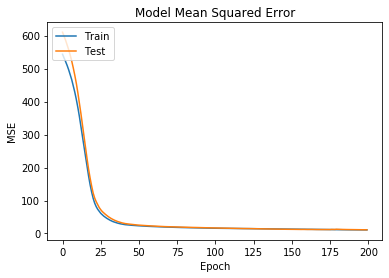

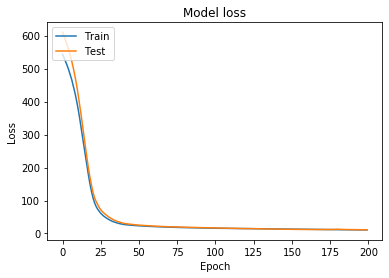

In [116]:
# Plotting mean squared error and validation error
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Linear Regression for Comparison

In [132]:
# Imports
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [133]:
random_forest = make_pipeline(
    RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
)

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_train)
mse = 100*mean_squared_error(y_train, y_pred)
print(f'Test Accuracy: {random_forest.score(X_test, y_test)}, Mean Squared Error: {mse}')

Test Accuracy: 0.8292382909260116, Mean Squared Error: 186.54641782178217


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [ ]:
##### Your Code Here #####

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.